In [58]:
import pandas as pd                                                     
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score                     # import all necessary librarys

In [60]:
data=pd.read_csv('Downloads/loan_data.csv')                             # import raw data
data.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [62]:
data.shape

(45000, 14)

In [64]:
data.isnull().sum()           #  checking null values

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [66]:
data.duplicated().sum()

0

In [68]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [69]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [72]:
data.drop(columns='person_gender',inplace=True)      # droping unwanted columnns

In [73]:
data.drop(columns='person_education',inplace=True)

In [75]:
data.drop(columns='person_emp_exp',inplace=True)

In [77]:
data.head(5)

,person_age,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [79]:
encoder=LabelEncoder()                 # using labelencoder for changing obj to int or float.

In [80]:
data['person_home_ownership']=encoder.fit_transform(data['person_home_ownership']) 

In [82]:
data['previous_loan_defaults_on_file']=encoder.fit_transform(data['previous_loan_defaults_on_file']) 

In [84]:
data['loan_intent']=encoder.fit_transform(data['loan_intent']) 

In [85]:
data.head(5)

,person_age,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,71948.0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,12282.0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,12438.0,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,79753.0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,66135.0,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [86]:
data['person_income']=(data['person_income']-data['person_income'].min())/(data['person_income'].max()-data['person_income'].min())

In [88]:
data['loan_amnt']=(data['loan_amnt']-data['loan_amnt'].min())/(data['loan_amnt'].max()-data['loan_amnt'].min())  # using min,max for reducing range between 0 to 1

In [91]:
data['credit_score']=(data['credit_score']-data['credit_score'].min())/(data['credit_score'].max()-data['credit_score'].min())

In [94]:
data.head(3)

,person_age,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0.008891,3,1.000000,4,16.02,0.49,3.0,0.371739,0,1
1,21.0,0.000595,2,0.014493,1,11.14,0.08,2.0,0.247826,1,0
2,25.0,0.000617,0,0.144928,3,12.87,0.44,3.0,0.532609,0,1


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_income                   45000 non-null  float64
 2   person_home_ownership           45000 non-null  int32  
 3   loan_amnt                       45000 non-null  float64
 4   loan_intent                     45000 non-null  int32  
 5   loan_int_rate                   45000 non-null  float64
 6   loan_percent_income             45000 non-null  float64
 7   cb_person_cred_hist_length      45000 non-null  float64
 8   credit_score                    45000 non-null  float64
 9   previous_loan_defaults_on_file  45000 non-null  int32  
 10  loan_status                     45000 non-null  int64  
dtypes: float64(7), int32(3), int64(1)
memory usage: 3.3 MB


In [97]:
data.head(15)

,person_age,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0.008891,3,1.000000,4,16.02,0.49,3.0,0.371739,0,1
1,21.0,0.000595,2,0.014493,1,11.14,0.08,2.0,0.247826,1,0
2,25.0,0.000617,0,0.144928,3,12.87,0.44,3.0,0.532609,0,1
3,23.0,0.009976,3,1.000000,3,15.23,0.44,2.0,0.619565,0,1
4,24.0,0.008082,3,1.000000,3,14.27,0.53,4.0,0.426087,0,1
5,21.0,0.000688,2,0.057971,5,7.14,0.19,2.0,0.308696,0,1
6,26.0,0.011883,3,1.000000,1,12.42,0.37,3.0,0.676087,0,1
7,24.0,0.012172,3,1.000000,3,11.11,0.37,4.0,0.423913,0,1
8,24.0,0.012886,3,1.000000,4,8.90,0.35,2.0,0.334783,0,1
9,21.0,0.000659,2,0.031884,5,14.74,0.13,3.0,0.543478,0,1


In [99]:
data.dropna(inplace=True)     # checking out layers  

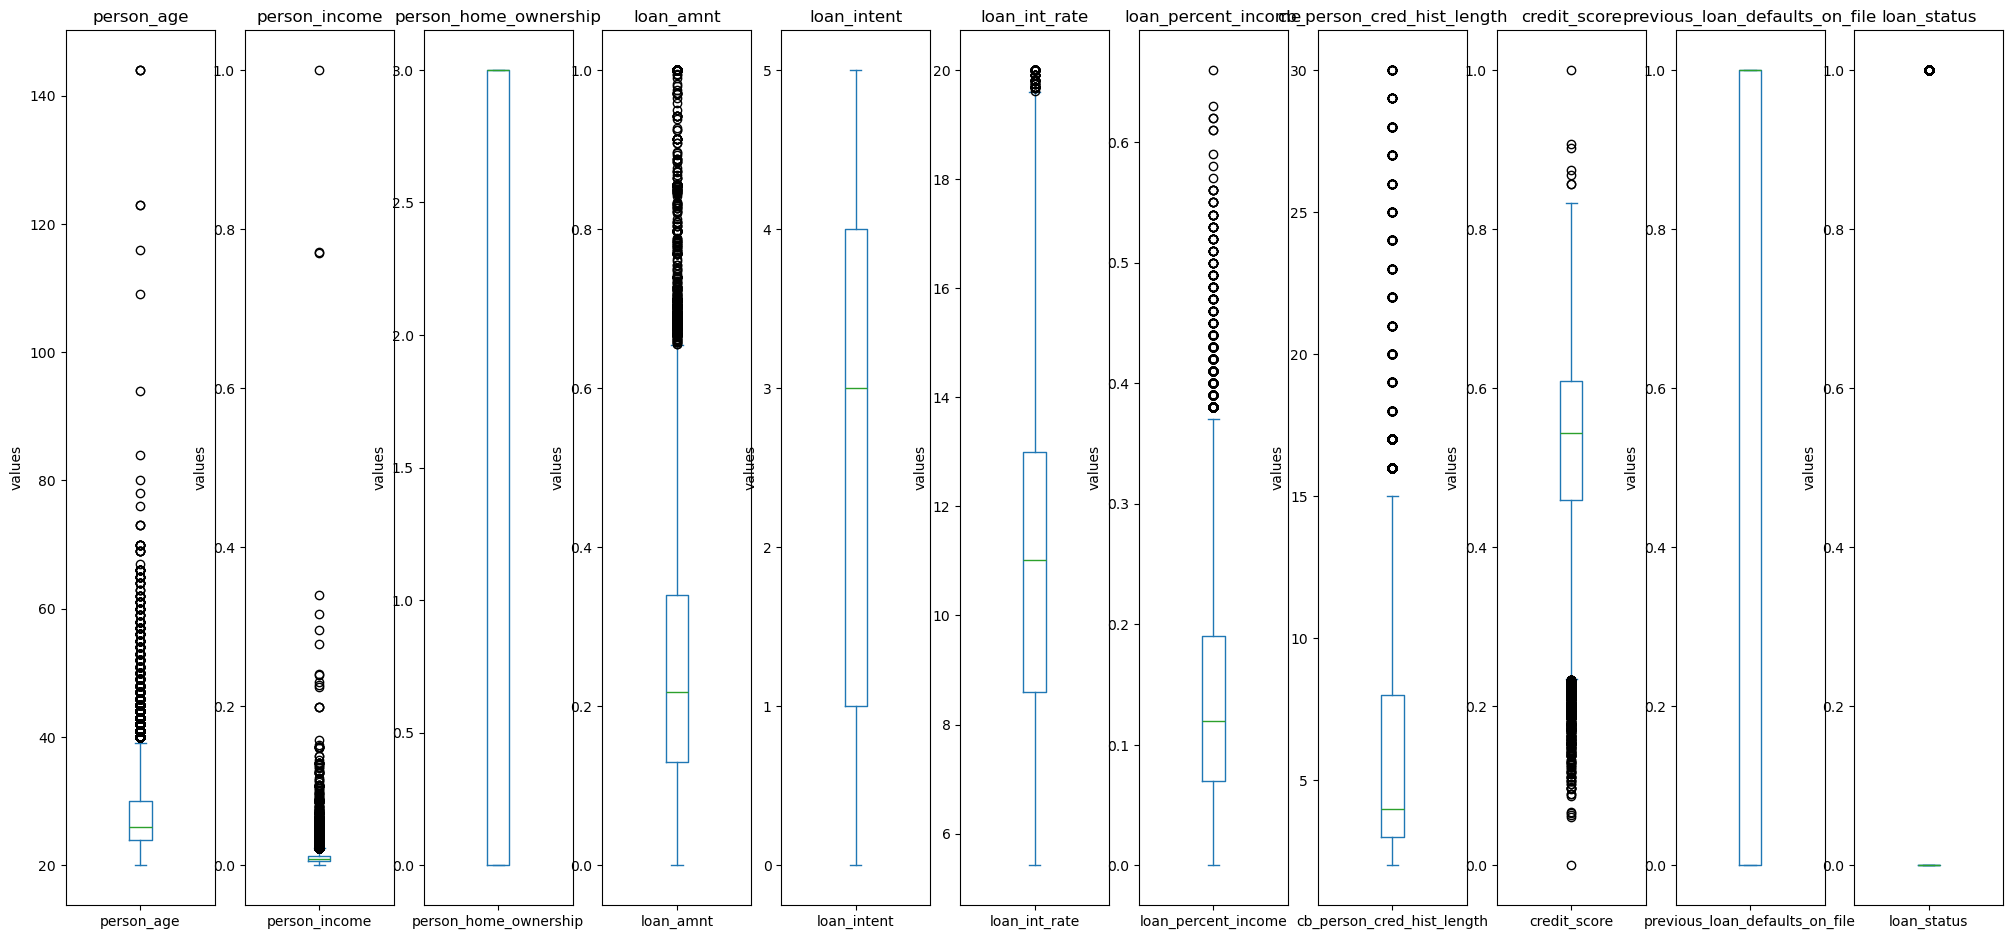

In [100]:
col=[]
length=0
for i in data.columns:
        col.append(i)
        length+=1
plt.figure(figsize=(25,25))
for j,i in enumerate(col,1):
    plt.subplot(2,length,j)
    data[i].plot(kind='box')
    plt.title(i)
    plt.ylabel('values')
plt.tight_layout
plt.show()

In [101]:
#rom scipy.stats.mstats import winsorize
#from scipy import stats
#import math

#numeric_cols = filtered_data.select_dtypes(include=[np.number]).columns
#filtered_data=data.copy()
#filtered_data[numeric_cols] = filtered_data[numeric_cols].apply(lambda x: winsorize(x, limits=[0.03, 0.03]))

#plt.figure(figsize=(25, 25))
#num_cols = 3
#num_plots = len(filtered_data.columns)
#num_rows = math.ceil(num_plots / num_cols)

#for j, i in enumerate(filtered_data.columns, 1):
    #plt.subplot(num_rows, num_cols, j)
    #filtered_data[i].plot(kind="box")
    #plt.title(i)
    #plt.ylabel("Values")

#plt.tight_layout()
#plt.show()

In [131]:
#data=filtered_data

{'whiskers': [<matplotlib.lines.Line2D at 0x15c3558f4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x15c3558db50>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c3558d730>],
 'medians': [<matplotlib.lines.Line2D at 0x15c3558ebd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c35504620>],
 'means': []}

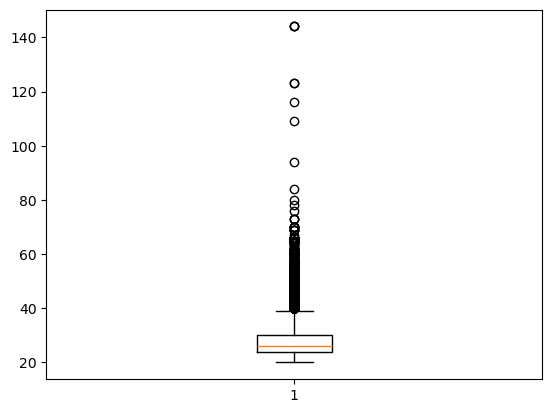

In [133]:
plt.boxplot(data['person_age'])

In [135]:
x=data.iloc[:,:-1]            # splitting into training columns

In [137]:
y=data.iloc[:,-1:]             # splitting into target column

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [141]:
log=LogisticRegression()        # using LogisticRegression

In [143]:
log.fit(x_train,y_train)

C:\Users\Madhan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Madhan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
y_pred=log.predict(x_test)

In [147]:
print(accuracy_score(y_pred,y_test)*100)

88.62222222222222


In [149]:
model=DecisionTreeClassifier()      # using DecisionTree

In [151]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [153]:
y_pred=model.predict(x_test)

In [155]:
print(accuracy_score(y_pred,y_test)*100)

89.44


In [157]:
y_train_pred=model.predict(x_train)

In [159]:
accuracy_score(y_train_pred,y_train)*100

100.0

In [161]:
dec_tree = DecisionTreeClassifier(max_depth=5)

In [163]:
bagging_cls= BaggingClassifier(estimator=dec_tree, n_estimators=50, random_state=42)   # using bagging technique for reducing overfittting.

In [165]:
bagging_cls.fit(x_train, y_train)

C:\Users\Madhan\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=50, random_state=42)

In [166]:
y_pred = bagging_cls.predict(x_test)

In [167]:
accuracy = accuracy_score(y_test, y_pred)

In [169]:
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 91.12%


In [173]:
y_train_pred = bagging_cls.predict(x_train)

In [175]:
train_accuracy = accuracy_score(y_train, y_train_pred)

In [177]:
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 91.45%


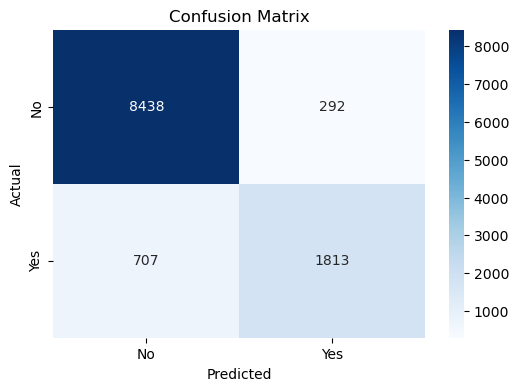

In [183]:
conf_matrix = confusion_matrix(y_test, y_pred)                          # Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['No', 'Yes'],yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [185]:
print("Classification Report: ")                                       # Classification Report
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8730
           1       0.86      0.72      0.78      2520

    accuracy                           0.91     11250
   macro avg       0.89      0.84      0.86     11250
weighted avg       0.91      0.91      0.91     11250



In [187]:
cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')       # Cross-validation scores

array([0.90192593, 0.90074074, 0.89792593, 0.89496296, 0.89496296])